<a href="https://colab.research.google.com/github/souban1234-tech/-/blob/master/xyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME: CONSUMER COMPLAINT RESOLUTION**

*   **TRAINING DATASET:https://bit.ly/3jr1HDM**

*    **TESTING DATASET:https://bit.ly/34QvXUv**

  






**INTRODUCTION:**


>**When consumers are not happy with some aspect of a business, they choose to reach out to the customer service and might raise a complaint. Businesses try their best to resolve the complaints that they receive to remain their good position in the market.**

>**Unhappy customers might raise follow up questions/complaints about the resolution provided, and this is detrimental to the business as it points to systemic failures in the customer support division and which could lead to a poor brand image of the company. Disputed complaints which are being resolved could be a critical dataset to derive essential learnings for any business. Predicting whether a complaint resolution will be accepted or rejected by a consumer can enable a business to proactively look at complaints which might be disputed and hence save unnecessary escalation as well as their reputation. Complaints which have a higher potential to be disputed concerning, to that particular product, the customer support agent can be trained to pay more attention to certain types of complaints.**

>**The Consumer Financial Protection Bureau (CFPB) in the United States receives several consumers’ complaints about the dealings of financial companies. It sends these complaints about their products and services to them for eliciting a response. The CFPB makes sure that these complaints are published here soon after the company responds or after 15 days since sending the complaint to the company.**

In [126]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [127]:
import pandas as pd
# Loading the dataset 

df=pd.read_csv("/content/drive/My Drive/Edureka_Consumer_Complaints_train.csv")
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [128]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')



> **This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage**



In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 



> **Return a tuple representing the dimensionality of the DataFrame.**



In [130]:
df.shape

(358810, 18)

>  **Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.
**


In [131]:
df.describe()

,Complaint ID
count,3.588100e+05
mean,1.043850e+06
std,5.945511e+05
min,5.000000e+00
25%,5.339312e+05
50%,1.064641e+06
75%,1.561380e+06
max,2.126221e+06




> **The column labels of the DataFrame**



In [132]:
 df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')



> **Program to visualize missing values in dataset**

> **• Analyze the missing values in the columns**







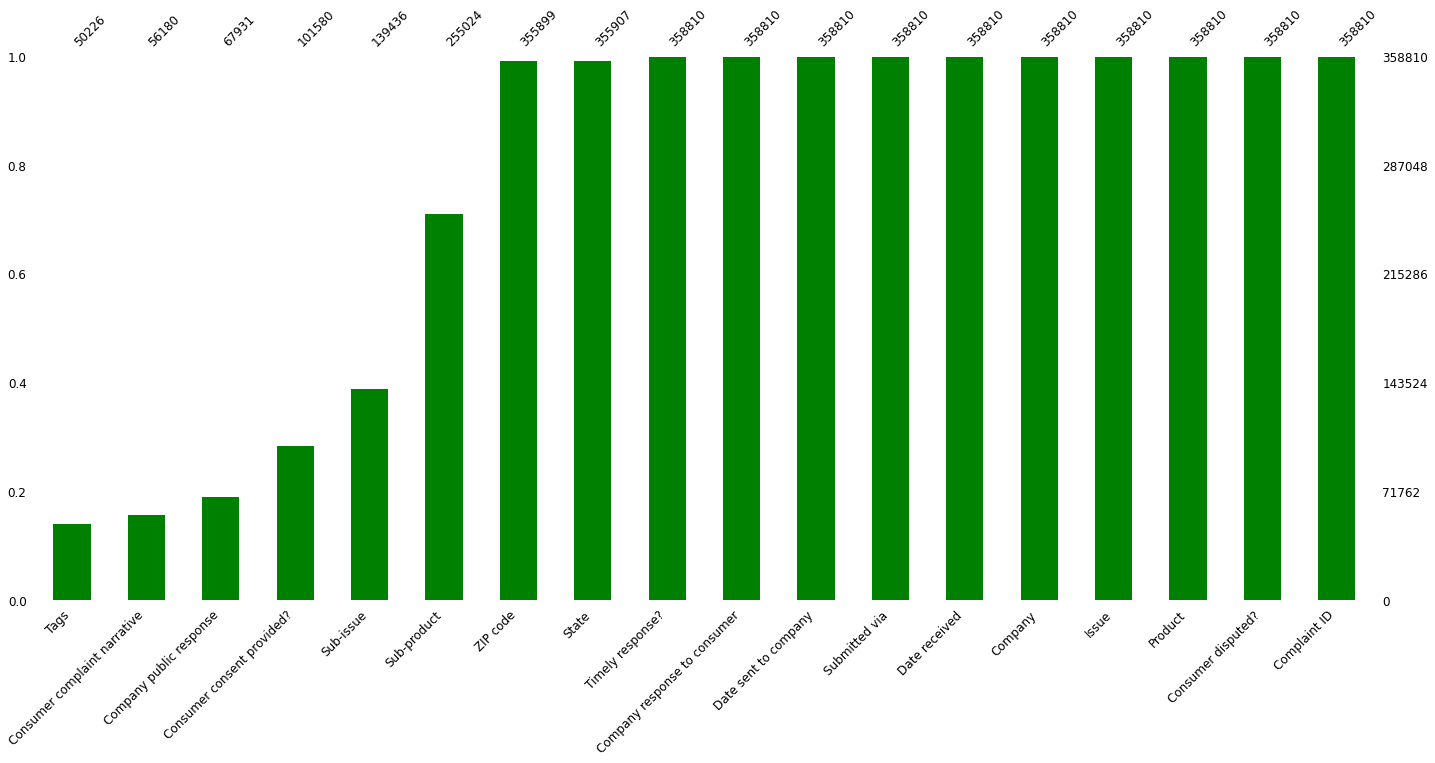

In [133]:
# Importing the libraries 
import pandas as pd 
import missingno as msno 
  
# Visualize the number of missing 
# values as a bar chart 
msno.bar(df,fontsize=12,color="green",sort="ascending");



> **Though we visually saw missing value in the dataset.Let's see the missing value ratio across all the columns**



In [134]:
pd.DataFrame({'Count':df.isnull().sum(),'Percentage':df.isnull().sum()/df.shape[0]})

,Count,Percentage
Date received,0,0.000000
Product,0,0.000000
Sub-product,103786,0.289251
Issue,0,0.000000
Sub-issue,219374,0.611393
Consumer complaint narrative,302630,0.843427
Company public response,290879,0.810677
Company,0,0.000000
State,2903,0.008091
ZIP code,2911,0.008113




> **• What is the number of unique values and most frequently occurring categories in the
Categorical Columns?**






> **At first check all columns with dtypes**



In [135]:
 df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object



> **Then select all categorical columns and numerical columns into two different variable**



In [136]:
df_categorical=df.select_dtypes(include=["object"])
df_numeric=df.select_dtypes(include=["int64"])
#or as we see above the dataset has only one numeric column,we can drop numeric column to get all categorical column
df_categorical=df.drop("Complaint ID",axis=1)
#df_numeric=df[["Complaint ID"]]
print(df_categorical.columns)
print(df_numeric.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')
Index(['Complaint ID'], dtype='object')


In [137]:
frequent_categories=df_categorical.nunique(axis=0,dropna=True).sort_values(ascending=False)
frequent_categories.head()

Consumer complaint narrative    55535
ZIP code                        24181
Company                          3064
Date received                    1758
Date sent to company             1701
dtype: int64

**Plots of most frequently occurring categories in the Categorical Columns**

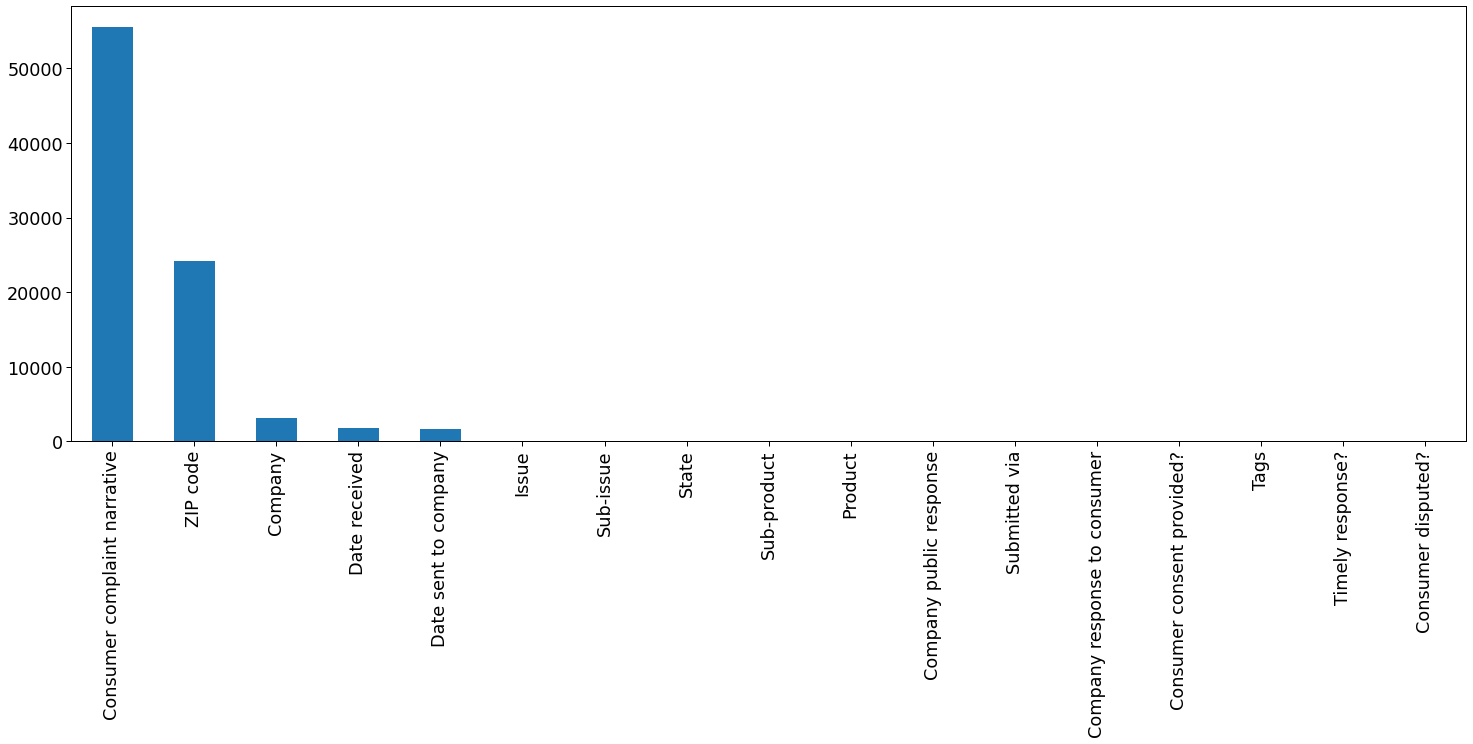

In [138]:
frequent_categories=df_categorical.nunique(axis=0,dropna=True).sort_values(ascending=False).plot.bar(figsize=(25,8))

**Therefore, the more number of unique values or most frequently occurring categories in the Categorical Columns are Consumer complaint narrative, Zip code, company, Date received, Data sent to company etc. in Descending order.**

In [139]:
df.Product.nunique()

12

In [140]:
df.Issue.unique()

array(['Incorrect information on credit report',
       'Deposits and withdrawals', 'Other',
       'Disclosure verification of debt', 'APR or interest rate',
       'Loan modification,collection,foreclosure', 'Payoff process',
       "Cont'd attempts collect debt not owed",
       'Taking out the loan or lease',
       'Credit card protection / Debt protection',
       'Communication tactics', 'Problems caused by my funds being low',
       'Loan servicing, payments, escrow account',
       'Application, originator, mortgage broker', 'Billing disputes',
       'Identity theft / Fraud / Embezzlement',
       'Problems when you are unable to pay',
       'Account opening, closing, or management',
       'Taking/threatening an illegal action',
       'Unsolicited issuance of credit card',
       'Managing the loan or lease', 'Payment to acct not credited',
       'Settlement process and costs',
       'Improper contact or sharing of info',
       "Credit reporting company's investigation

**• Can you identify the top issues raised by consumers in this dataset?**

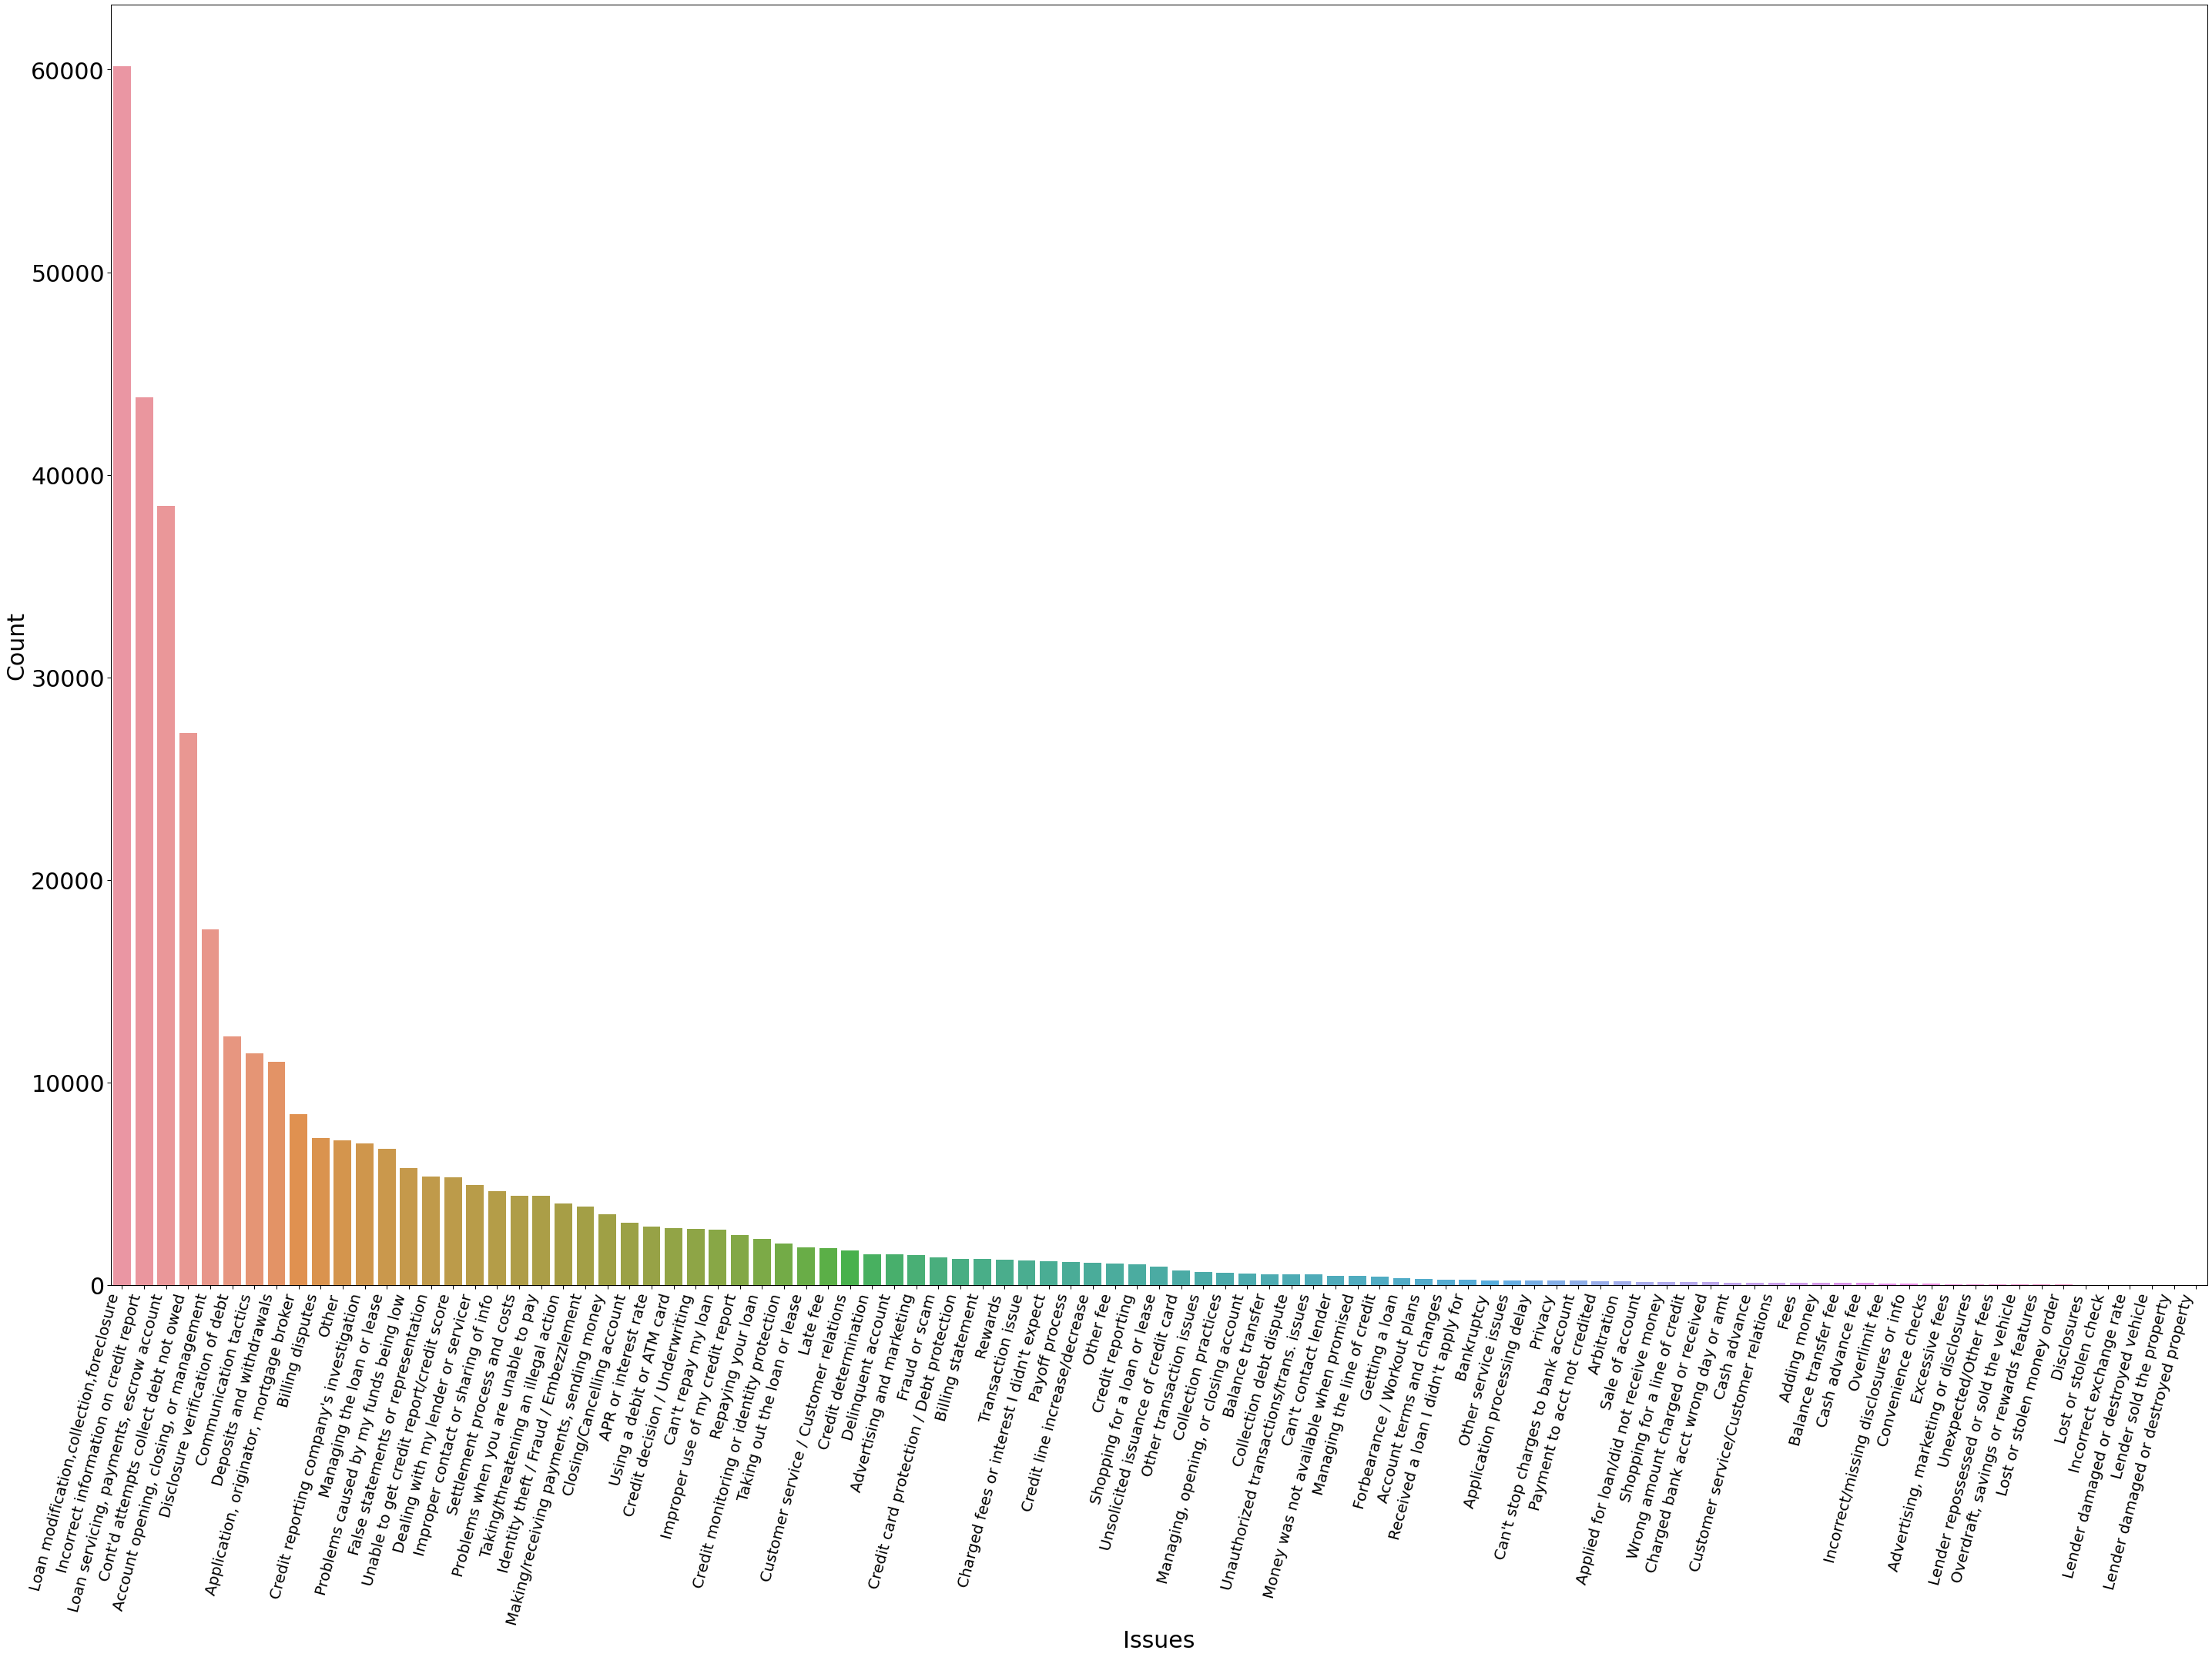

In [141]:
  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (40,30))
plt.xticks(rotation=75, fontsize=20, ha="right")
plt.yticks(fontsize=30)
g = sns.countplot(x='Issue', data = df ,order = df["Issue"].value_counts().index)
g.set_xlabel("Issues", fontsize=30)
g.set_ylabel("Count", fontsize=30)
plt.tight_layout()


**From the above visualization technique we get 
top 3 issues raised by customers in descending order are:** 

1. **Loan modification,collection,foreclosure**
2. **Incorrect information on credit report**
3. **Loan servicing,payments,escrow account**






> **• Are there some products which receive a higher number of complaints?**



Text(0, 0.5, 'Count')

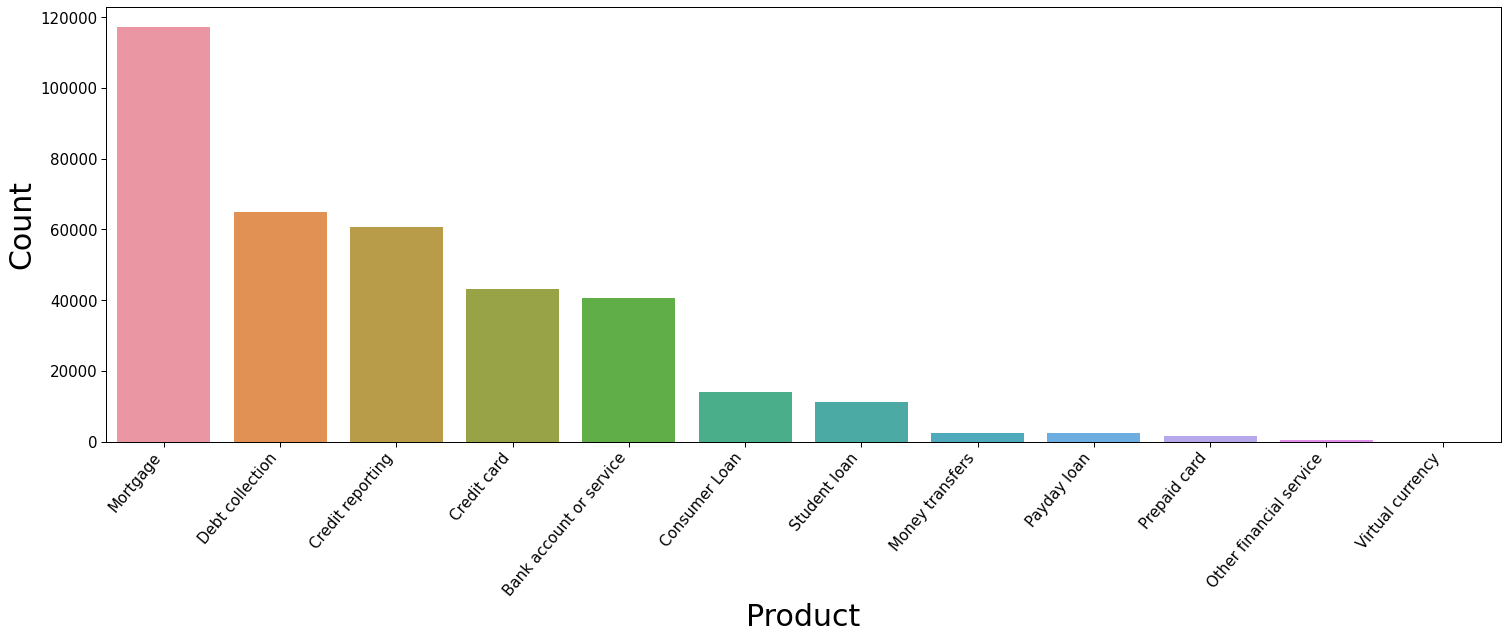

In [142]:
plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='Product', data = df,  order = df["Product"].value_counts().index)
g.set_xlabel("Product", fontsize=30)
g.set_ylabel("Count", fontsize=30)

**We see from the countplot that consumer mostly complain about the Mortgage, Debt collection,Credit reporting,Credit card .**


**• Do all the companies receive the same number of complaints**

In [143]:
companies = df.groupby('Company')["Company"].value_counts().sort_values(ascending=False)
print(len(companies))
companies.head()

3064


Company                Company              
Bank of America        Bank of America          34903
Wells Fargo & Company  Wells Fargo & Company    26490
JPMorgan Chase & Co.   JPMorgan Chase & Co.     21677
Equifax                Equifax                  21489
Experian               Experian                 20075
Name: Company, dtype: int64

**Let's see it visually.**

Text(0, 0.5, 'Count')

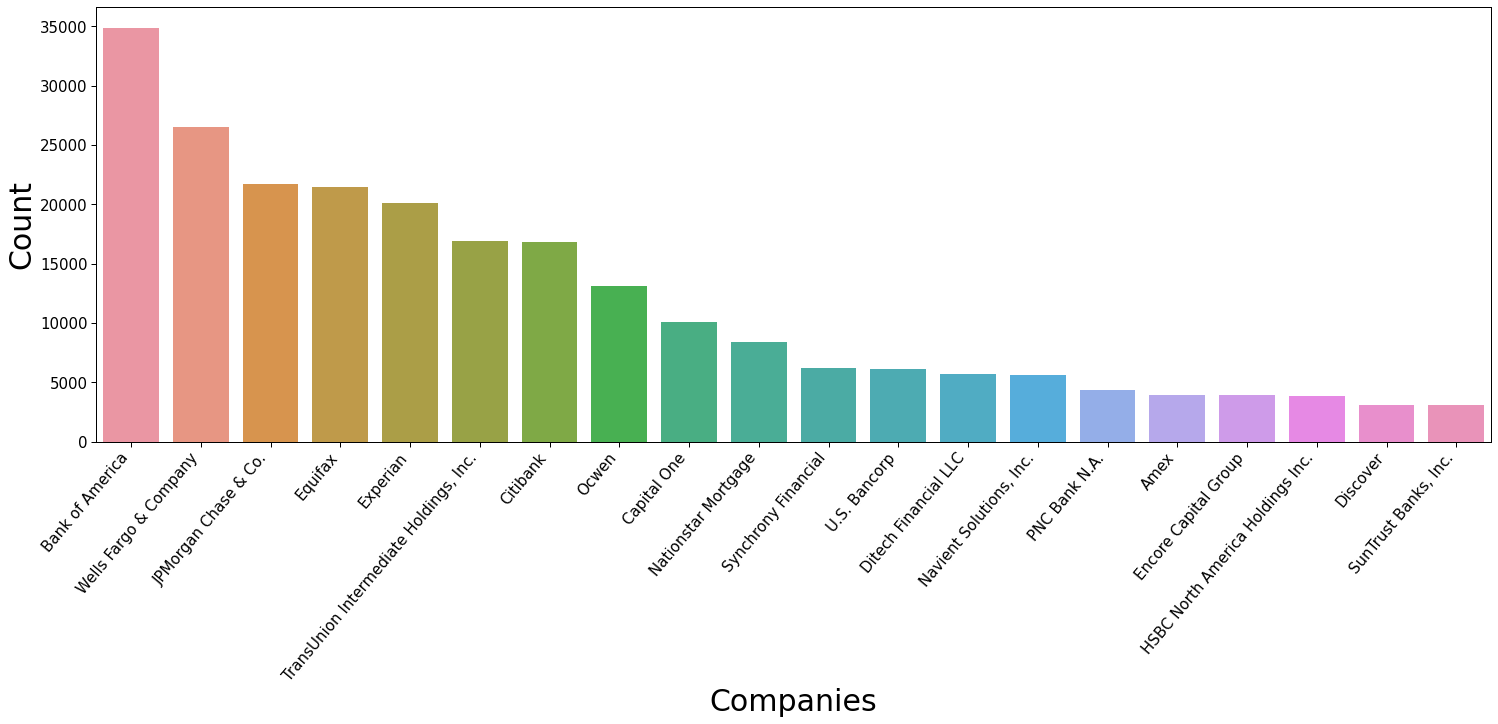

In [144]:
plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='Company', data = df,  order = df["Company"].value_counts().head(20).index)
g.set_xlabel("Companies", fontsize=30)
g.set_ylabel("Count", fontsize=30)

**Nope,we see from the countplot that all companies didn't recieve same number of complaints.Worst 5 companies with largest number of complaints are Bank of america,Wells Fargo & Company,Equifax,JPMorgan Chase & Co.,Experian.**

**• How are the complaints submitted - through which medium?**

In [145]:
submitted_through = df.groupby('Submitted via')["Submitted via"].value_counts().sort_values(ascending=False)
print(len(submitted_through))
submitted_through.head()

6


Submitted via  Submitted via
Web            Web              235462
Referral       Referral          68450
Phone          Phone             25802
Postal mail    Postal mail       23644
Fax            Fax                5264
Name: Submitted via, dtype: int64

**Now see it visually**

Text(0, 0.5, 'Count')

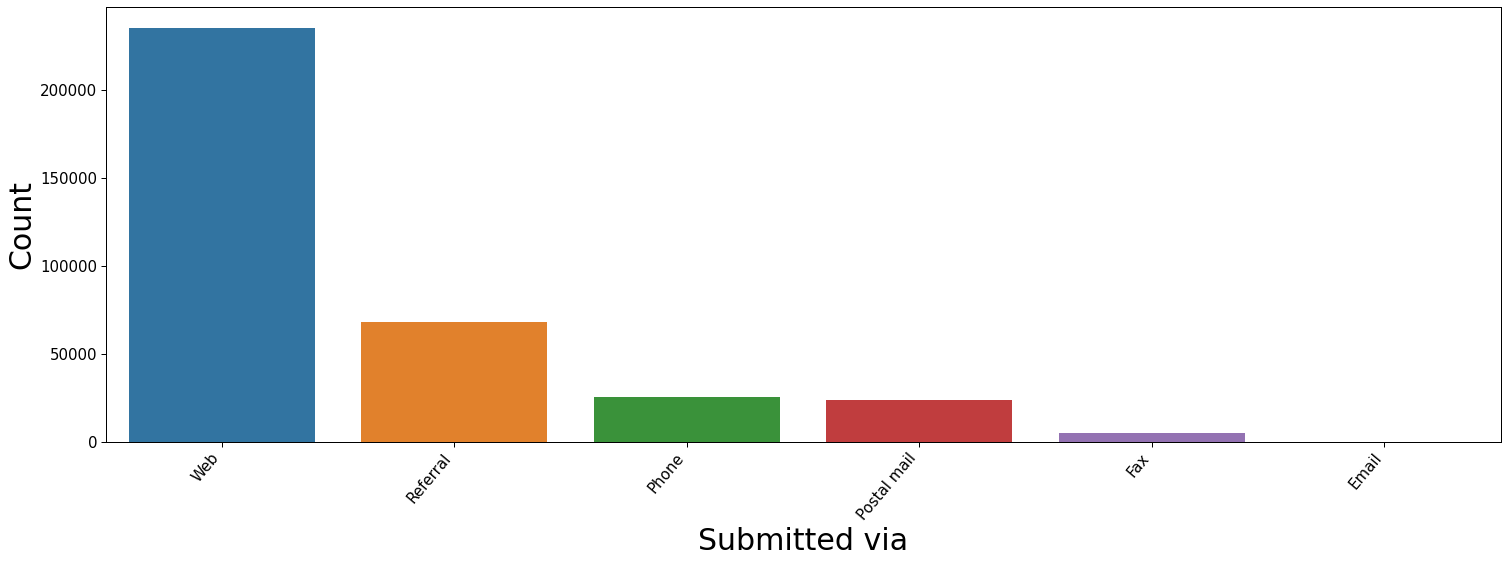

In [146]:
plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='Submitted via', data = df,  order = df["Submitted via"].value_counts().head(20).index)
g.set_xlabel("Submitted via", fontsize=30)
g.set_ylabel("Count", fontsize=30)

**Most of the complaints submitted via the Web.Though Via Referral also consumer lodge a lot of complaints. Medium like Phone, Postal mail is not so used oftentimes.Fax, Email is more or less not used as a great platform to lodge a complaint.**

In [147]:
submitted_through = df.groupby('Submitted via')["Company"].value_counts().sort_values(ascending=False)
print(len(submitted_through))
submitted_through.head()

6551


Submitted via  Company                               
Web            Bank of America                           17663
               Equifax                                   16479
               Experian                                  14847
               Wells Fargo & Company                     13452
               TransUnion Intermediate Holdings, Inc.    12473
Name: Company, dtype: int64

**Performing EDA plots**

Text(0, 0.5, 'Submitted via')

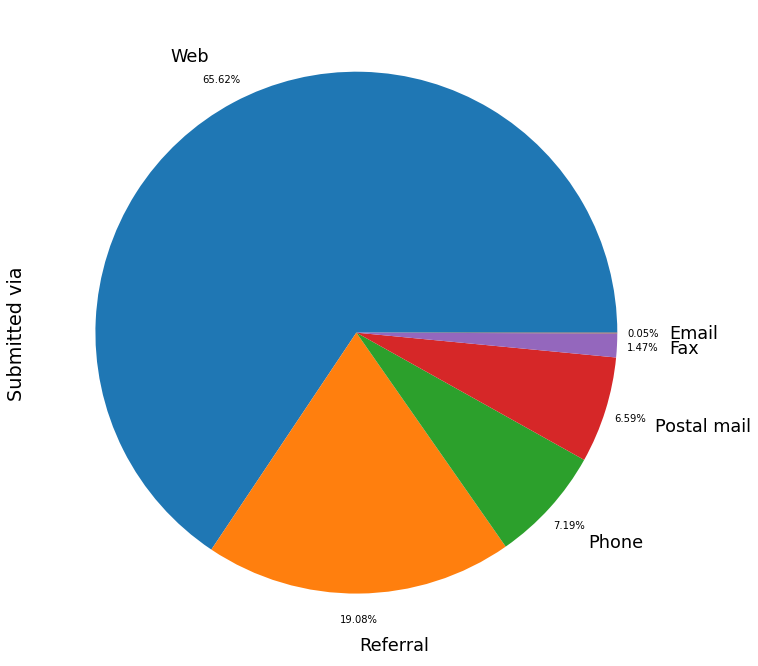

In [148]:
df['Submitted via'].value_counts().plot.pie(figsize = (12,12),autopct='%1.2f%%',pctdistance=1.1, labeldistance=1.2)
plt.ylabel('Submitted via')


**We see from the above plot that top worst companies data are listed via the web by 65% and via referral by 19%.**




**• What is the geographical distribution of the complaints?**

In [149]:
geographical_distribution=df.groupby("State")["State"].value_counts().sort_values(ascending=False)
print(len(geographical_distribution))
geographical_distribution.head()

62


State  State
CA     CA       52368
FL     FL       34567
TX     TX       26683
NY     NY       24554
GA     GA       15886
Name: State, dtype: int64

**Let's see this in plots:**


Text(0, 0.5, 'Count')

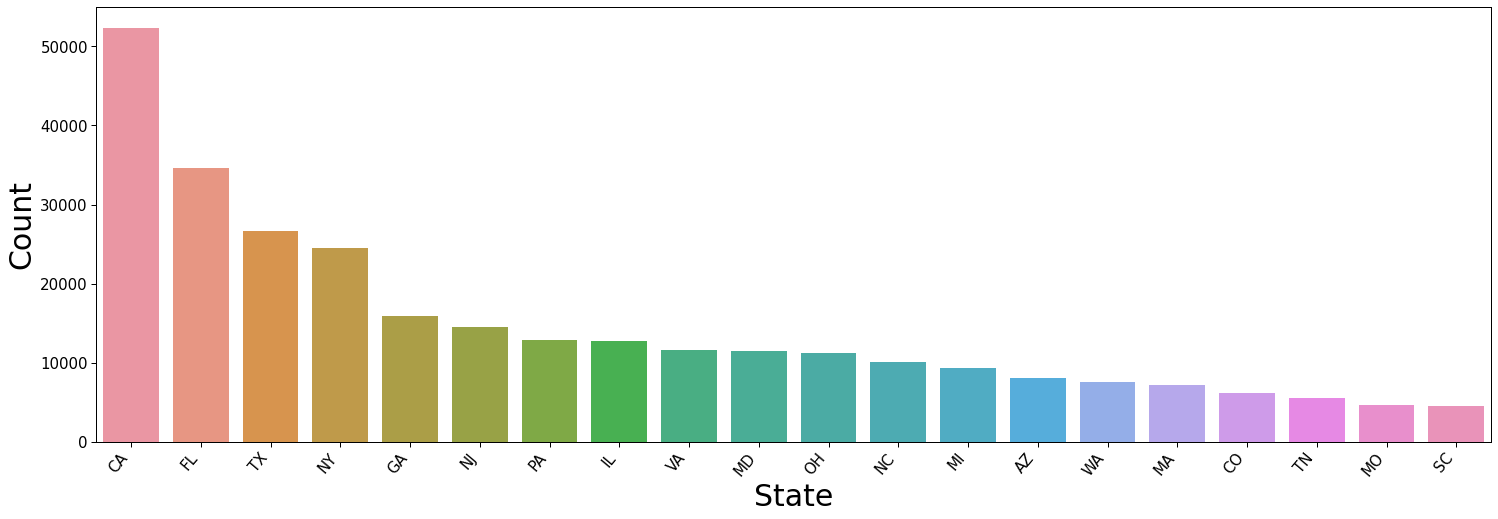

In [150]:
plt.figure(figsize = (25,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='State', data = df,  order = df["State"].value_counts().head(20).index)
g.set_xlabel("State", fontsize=30)
g.set_ylabel("Count", fontsize=30)

**Most of the complaints are from "CA", "FL", "TX", "NY", "GA" which are an abbreviation of states California, Florida, Texas, New York, Georgia of United States in descending order.**

**Univariate plots:
These plots are based on a single variable and show the frequency of uniques values of a given variable.**



> **Kerner Density Estimate (KDE)**




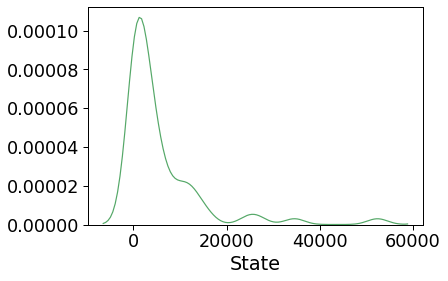

In [151]:

sns.set_color_codes()
ax = sns.distplot(geographical_distribution,hist=False,color="g",bins=500)




> **Histogram**



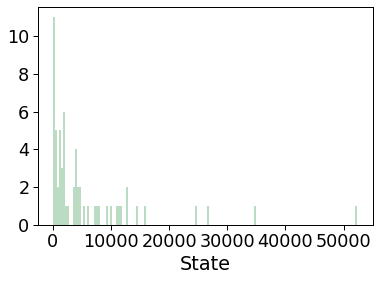

In [152]:
sns.set_color_codes()
ax = sns.distplot(geographical_distribution,kde=False,color="g",bins=150)


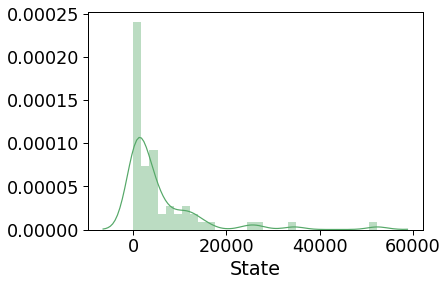

In [153]:
sns.set_color_codes()
ax = sns.distplot(geographical_distribution,color="g",bins=30)


**We can see that the count of different complaints value are present across all States and infer that most of the number of the state lodged complaints are between 0 to  3000.**

**• Do the complaints rise in any specific month or day of the week?**


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 



> **We see that the data type of "Date received" column is object format. So, we need to change it to DateTime object.**





In [155]:
df["Date received"]=pd.to_datetime(df["Date received"],dayfirst=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 358810 non-null  datetime64[ns]
 1   Product                       358810 non-null  object        
 2   Sub-product                   255024 non-null  object        
 3   Issue                         358810 non-null  object        
 4   Sub-issue                     139436 non-null  object        
 5   Consumer complaint narrative  56180 non-null   object        
 6   Company public response       67931 non-null   object        
 7   Company                       358810 non-null  object        
 8   State                         355907 non-null  object        
 9   ZIP code                      355899 non-null  object        
 10  Tags                          50226 non-null   object        
 11  Consumer cons

In [156]:
df["Date received"]

0        2015-10-14
1        2015-04-26
2        2013-12-20
3        2016-03-03
4        2015-01-30
            ...    
358805   2014-04-14
358806   2013-03-14
358807   2013-02-01
358808   2015-06-25
358809   2015-05-12
Name: Date received, Length: 358810, dtype: datetime64[ns]



> **Now we see that it got converted into a DateTime object. We want new columns showing year and month separately.**



In [157]:
df["Day"]=df['Date received'].dt.day
df['Month'] = df['Date received'].apply(lambda time: time.month)
df['Day of Week'] = df['Date received'].apply(lambda time: time.dayofweek)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Day of Week
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,6
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,4
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,3
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,4


In [158]:
df["Day of Week"].unique()

array([2, 6, 4, 3, 0, 1, 5])

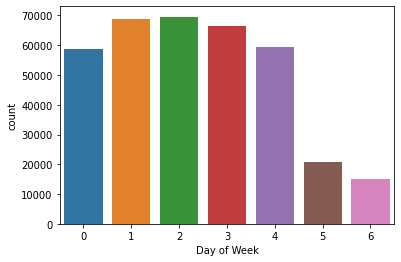

In [ ]:
sns.countplot(x="Day of Week",data=df)#0=Monday,1=Tuesday,  so on.

**Here, We see the number of complaints on the weekend day decrease drastically. Lesser no of people works in weekend days may be the reason for that.**

In [159]:
df.Month.unique()

array([10,  4, 12,  3,  1,  2,  8,  6, 11,  7,  5,  9])

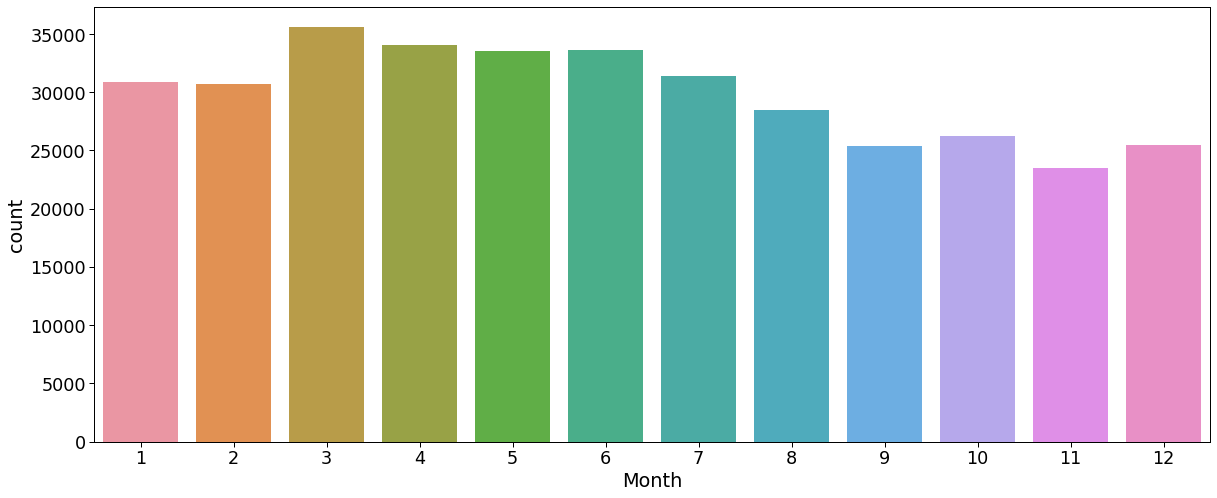

In [160]:
plt.figure(figsize = (20,8))
sns.countplot(x="Month",data=df)

**The number of complaints in each month does not differ much though there was a slight increase in the no. of objections in the month March,April, May, June**

**• How do companies respond to the complaints? What are the most common responses
received?**

Text(0, 0.5, 'Count')

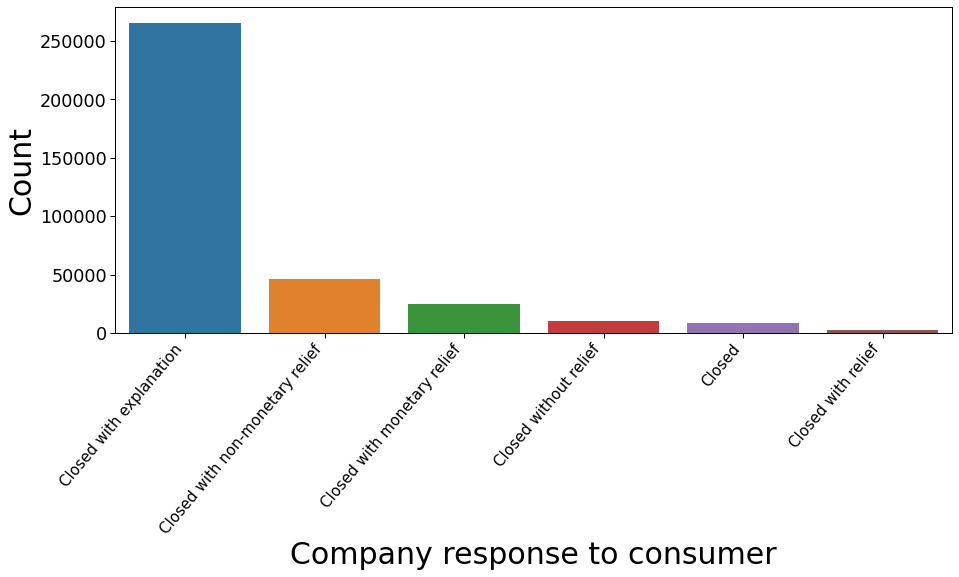

In [161]:

plt.figure(figsize = (15,6))
plt.xticks(rotation="50", ha="right", size = 15)
g = sns.countplot(x ="Company response to consumer", data =df, 
                  order = df['Company response to consumer'].value_counts().index)
g.set_xlabel("Company response to consumer", fontsize=30)
g.set_ylabel("Count", fontsize=30)

**Most of complaints are closed with explanation without any monetory or non-monetary relief. So, if you have a monetary dispute good luck getting that money back.**

**• Does responding to complaints in a timely manner alter the number of consumers that
disputed the company response and those that did not?**

**We are using pandas crosstab method here**

In [162]:
#I am using "Company response to consumer" as index & "Timely response?" as a column here
df_cross=pd.crosstab(df["Consumer disputed?"], df["Timely response?"],dropna=True)
print(df_cross)
#Let's see type of df_cross
print(type(df_cross))

Timely response?      No     Yes
Consumer disputed?              
No                  4906  277732
Yes                 1229   74943
<class 'pandas.core.frame.DataFrame'>


**Let's see it visually to get more insights from the data using heatmap**

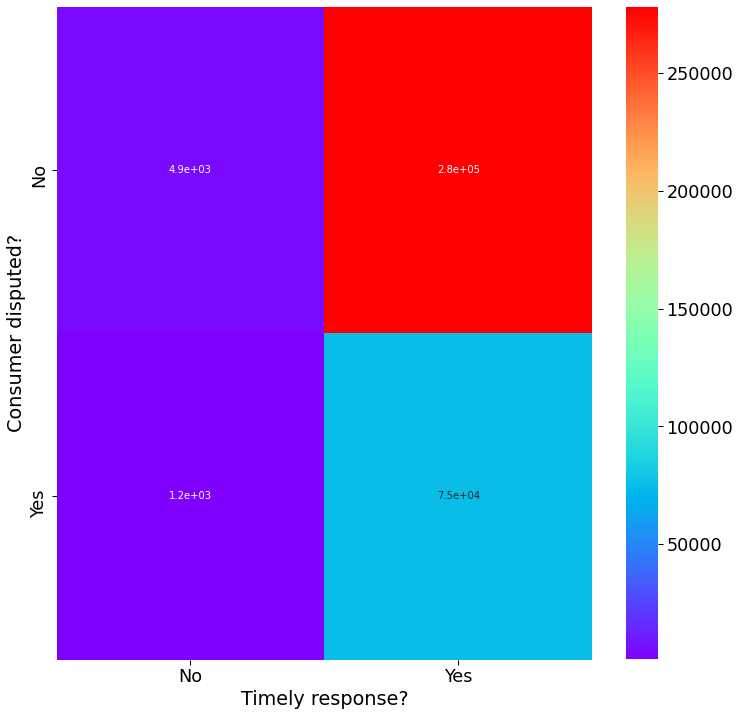

In [163]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cross,annot=True,cmap="rainbow")

**I need to normalize the df_cross data frame by using a parameter normalize and keeping that to be true.**

In [164]:
df_cross1=pd.crosstab(df["Consumer disputed?"], df["Timely response?"],dropna=True,normalize=True)
print(df_cross1)

Timely response?          No       Yes
Consumer disputed?                    
No                  0.013673  0.774036
Yes                 0.003425  0.208865


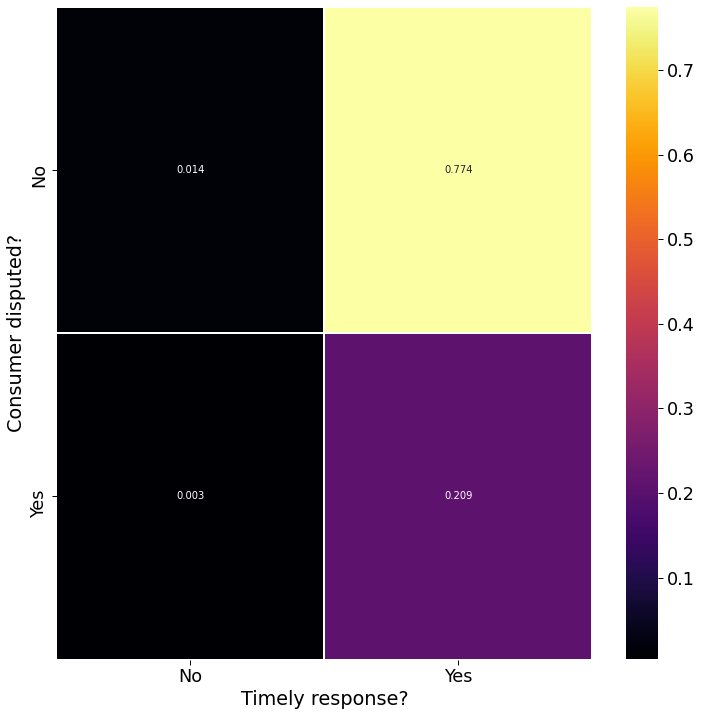

In [165]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cross1,linewidth=.7,annot=True,cmap="inferno",fmt=".3f")

**Now, I finally see that plot is understandable. Dark sets for lower values & lighter colour set for a higher value. Finally responds to a timely manner decrease the number of consumers that disputed the company responded with a great extent over those that did not.**

# **PART 2 - TEXT BASED MODELLING**



> **I would need to remove NAs from the Product and the Consumer Complaint
Narrative column before attempting to build a Text Classifier**



In [166]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Day',
       'Month', 'Day of Week'],
      dtype='object')

In [167]:
col = ['Product', 'Consumer complaint narrative']
df1= df[col]
df1= df1[pd.notnull(df1['Consumer complaint narrative'])]

In [168]:
df1.columns=['Product', 'Consumer complaint narrative']
df1['category_id'] = df1['Product'].factorize()[0]
cat_id_df = df1[["Product", "category_id"]].drop_duplicates().sort_values('category_id')
cat_to_id = dict(cat_id_df.values)
id_to_cat = dict(cat_id_df[['category_id','Product']].values)
df1.head()

,Product,Consumer complaint narrative,category_id
1,Bank account or service,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,0
6,Mortgage,Homeowner applied for 2nd modification due to ...,1
11,Debt collection,In XXXX I started service with a cable company...,2
12,Consumer Loan,I went into a XXXX dealership and was told I w...,3
23,Debt collection,"When requested, Portfolio Recovery Services ( ...",2


In [169]:
df1.dtypes

Product                         object
Consumer complaint narrative    object
category_id                      int64
dtype: object

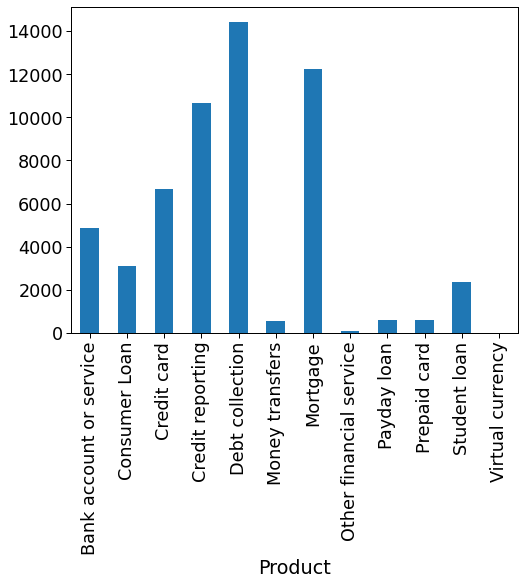

In [170]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (8,6))
df1.groupby('Product')["Consumer complaint narrative"].count().plot.bar(ylim=0)

In [171]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [172]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
df1["tokenize"]=df1["Consumer complaint narrative"].apply(word_tokenize)
result=set()
df1["tokenize"].apply(result.update)
result_count=len(list(result))
print(result_count)

84789


In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer= TfidfVectorizer(min_df=20,max_df=1000,lowercase=True,tokenizer=word_tokenize,
                     ngram_range= (1,1), #to indicate that we want to consider only unigrams
                    stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [174]:
import numpy as np
feature=vectorizer.fit_transform(df1["Consumer complaint narrative"]).toarray()
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab)

In [175]:
vocab.tolist()[:15]

["'d",
 "'ll",
 "'re",
 "'xxxx",
 '*',
 '**',
 '+',
 '-i',
 '-the',
 '-they',
 '-xxxx',
 '..',
 '..i',
 '.00',
 '.and']

In [176]:
labels = df1.category_id
print(feature.shape)
labels.shape

(56180, 6795)


(56180,)

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df1['Consumer complaint narrative'], df1['Product'], random_state= 0)

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
from sklearn.feature_extraction.text import TfidfTransformer
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)


In [179]:
print(clf.predict(count_vect.transform(['I have outdated information on my credit repor'])))

['Credit reporting']


In [180]:
y_pred = clf.predict(count_vect.transform(X_val))
from sklearn import metrics
print(metrics.classification_report(y_val,y_pred, labels= df.Product, target_names=df['Product'].unique()));

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1989: UserWarning: labels size, 358810, does not match size of target_names, 12
  .format(len(labels), len(target_names))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

       Credit reporting       0.84      0.85      0.84      2632
Bank account or service       0.86      0.75      0.80      1245
            Credit card       0.75      0.83      0.79      1654
        Debt collection       0.89      0.74      0.81      3603
               Mortgage       0.89      0.74      0.81      3603
          Consumer Loan       0.75      0.83      0.79      1654
            Payday loan       0.91      0.94      0.92      3055
           Student loan       0.75      0.83      0.79      1654
        Money transfers       0.86      0.75      0.80      1245
Other financial service       0.89      0.74      0.81      3603
           Prepaid card       0.84      0.85      0.84      2632
       Virtual currency       0.89      0.74      0.81      3603

              micro avg       0.87      0.85      0.86 892451388
              macro avg       0.84      0.84      0.83 892451388
           weighted avg

In [181]:
print(metrics.confusion_matrix(y_val,y_pred))

[[ 930   23  124   20    9   27   48    8    2   36   18]
 [   9  550   36   40   62    4   52    5   13    5   54]
 [  39   20 1381   69   66   14   22    6    0   16   21]
 [   9   50  104 2243  109    2   47   12    3   10   43]
 [  33  117  155  251 2650   20  109   34   34   21  179]
 [  25    2    7    3    0   81    3    0    0    7    3]
 [  17   38   14   40   20    7 2884    5    1    2   27]
 [   8    1    1    1    0    4    2    3    0    1    2]
 [   6   25    5    7   21    1    5    3   69    1   17]
 [   8    1   21    0    2    1    0    0    0  120    2]
 [   1    7    3   10   22    0    9    0    1    0  504]]


# **PART 3 - CLASSIFICATION MODELS AND FEATURE ENGINEERING**


> **○ Do not use date columns as is; you can use them to create other features. For example, to extract which month of the year, the complaint was filed. Was it the first week or last week of the month? What was the gap between the filing of complaints and the data being sent to the company? These are just ideas, feel free to make any other features from these**





In [182]:
!pip install dask[dataframe] --upgrade 
import pandas as pd
import pandas_profiling
import dask.dataframe as dd
pd.options.display.max_columns=False
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

Requirement already up-to-date: dask[dataframe] in /usr/local/lib/python3.6/dist-packages (2.25.0)


In [183]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Day of Week
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,6
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,4
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,3
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,4


In [184]:
df["Consumer disputed?"].value_counts()

No     282638
Yes     76172
Name: Consumer disputed?, dtype: int64

In [185]:
df.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company                    object
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
Day                                      int64
Month                                    int64
Day of Week                              int64
dtype: object



> **So, I saw that "Date received" had been DateTime format already as we did it earlier. Just need to do only extract "year" as a new column from it & need to format "Data sent to company" column as DateTime object & from that column I need to extract, date, month, year.**





In [186]:
df['year'] = df['Date received'].dt.year

In [187]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Day',
       'Month', 'Day of Week', 'year'],
      dtype='object')

In [188]:
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])
df.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
Day                                      int64
Month                                    int64
Day of Week                              int64
year         

In [189]:
df['year_sent'] = df['Date sent to company'].dt.year
df['month_sent'] = df['Date sent to company'].dt.month
df['day_sent'] = df['Date sent to company'].dt.day
df['Day of Week_sent'] = df['Date sent to company'].apply(lambda time: time.dayofweek)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Day of Week,year,year_sent,month_sent,day_sent,Day of Week_sent
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2,2015,2015,10,14,2
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,6,2015,2015,4,26,6
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,4,2013,2014,1,3,4
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,3,2016,2016,3,4,4
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,4,2015,2015,1,30,4


Text(0.5, 0, 'Percentage complaints')

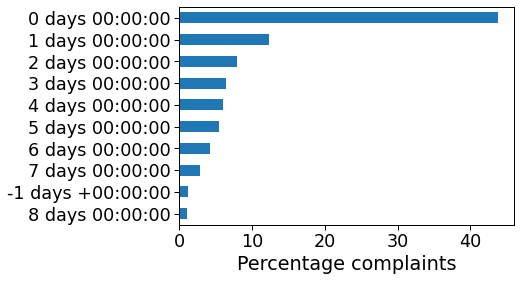

In [190]:
#timegap is basically the gap between the filing of complaints and the data being sent to the company
(((df['Date sent to company'] - df['Date received'])
 .value_counts()/len(df)*1e2)
 .head(10)[::-1]
 .plot(kind='barh'))
plt.xlabel('Percentage complaints')

**From the above, I see that most percentages of complaints are directed right away to the respective company more or less the same day or after one day.**

---



**We don't need "Date received","Date sent to company" columns**

In [191]:
df.drop(["Date received","Date sent to company"],axis=1,inplace=True)


In [192]:
df.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Day of Week,year,year_sent,month_sent,day_sent,Day of Week_sent
0,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,Closed with explanation,Yes,No,1605653,14,10,2,2015,2015,10,14,2
1,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,Closed with explanation,Yes,Yes,1347613,26,4,6,2015,2015,4,26,6
2,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,Closed with non-monetary relief,Yes,No,640394,20,12,4,2013,2014,1,3,4
3,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,Closed with explanation,Yes,No,1815134,3,3,3,2016,2016,3,4,4
4,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,Closed with explanation,Yes,Yes,1218613,30,1,4,2015,2015,1,30,4


In [193]:
df.tail()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Day of Week,year,year_sent,month_sent,day_sent,Day of Week_sent
358805,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Experian,OR,97306,NaN,NaN,Web,Closed with non-monetary relief,Yes,No,806868,14,4,0,2014,2014,4,13,6
358806,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Citibank,OH,43026,NaN,NaN,Referral,Closed with non-monetary relief,Yes,No,355254,14,3,3,2013,2013,3,18,0
358807,Credit card,NaN,Payoff process,NaN,NaN,NaN,Capital One,TX,76021,NaN,NaN,Web,Closed,Yes,Yes,283994,1,2,4,2013,2013,2,1,4
358808,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,Encore Capital Group,FL,33256,NaN,NaN,Phone,Closed with non-monetary relief,Yes,No,1438670,25,6,3,2015,2015,6,29,0
358809,Credit reporting,NaN,Incorrect information on credit report,Personal information,NaN,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",FL,32583,NaN,NaN,Referral,Closed with explanation,Yes,No,1372035,12,5,1,2015,2015,6,3,2


In [194]:
print(df.isnull().sum())
print(df.shape)

Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                             2903
ZIP code                          2911
Tags                            308584
Consumer consent provided?      257230
Submitted via                        0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
Day                                  0
Month                                0
Day of Week                          0
year                                 0
year_sent                            0
month_sent                           0
day_sent                             0
Day of Week_sent                     0
dtype: int64
(358810, 24)


In [195]:

df['Consumer disputed?'] = df['Consumer disputed?'].astype('category')
df.dtypes

Product                           object
Sub-product                       object
Issue                             object
Sub-issue                         object
Consumer complaint narrative      object
Company public response           object
Company                           object
State                             object
ZIP code                          object
Tags                              object
Consumer consent provided?        object
Submitted via                     object
Company response to consumer      object
Timely response?                  object
Consumer disputed?              category
Complaint ID                       int64
Day                                int64
Month                              int64
Day of Week                        int64
year                               int64
year_sent                          int64
month_sent                         int64
day_sent                           int64
Day of Week_sent                   int64
dtype: object

In [196]:
df['Consumer disputed']= df['Consumer disputed?'].cat.codes
df['Consumer disputed'].value_counts()

0    282638
1     76172
Name: Consumer disputed, dtype: int64

In [197]:
df.drop("Consumer disputed?",axis=1,inplace=True)


In [198]:
print(df.dtypes)
print(df.isnull().sum())

Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
Day                              int64
Month                            int64
Day of Week                      int64
year                             int64
year_sent                        int64
month_sent                       int64
day_sent                         int64
Day of Week_sent                 int64
Consumer disputed                 int8
dtype: object
Product                              0
Sub-product

In [199]:
test_df=pd.read_csv("/content/drive/My Drive/Edureka_Consumer_Complaints_test.csv")
test_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [200]:
test_df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [201]:
test_df["Date received"]=pd.to_datetime(test_df["Date received"])
test_df["Date sent to company"]=pd.to_datetime(test_df["Date sent to company"])


In [202]:
test_df.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Complaint ID                             int64
dtype: object

In [203]:
test_df['Day'] = test_df['Date received'].dt.day
test_df['Month'] = test_df['Date received'].dt.month
test_df['Day of Week'] = test_df['Date received'].apply(lambda time: time.dayofweek)
test_df['year'] = test_df['Date received'].dt.year

test_df['year_sent'] = test_df['Date sent to company'].dt.year
test_df['month_sent'] = test_df['Date sent to company'].dt.month
test_df['day_sent'] = test_df['Date sent to company'].dt.day
test_df['Day of Week_sent'] = test_df['Date sent to company'].apply(lambda time: time.dayofweek)
#I no longer need the "Date received,""Date sent to company" column 

test_df.drop(["Date received","Date sent to company"],axis=1,inplace=True)
test_df.head()


,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Complaint ID,Day,Month,Day of Week,year,year_sent,month_sent,day_sent,Day of Week_sent
0,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,Closed with monetary relief,Yes,1198133,17,1,5,2015,2015,1,17,5
1,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,Closed with explanation,Yes,1979989,22,6,2,2016,2016,6,22,2
2,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,Closed with explanation,Yes,1552090,4,9,4,2015,2015,9,4,4
3,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,Closed with non-monetary relief,Yes,1929306,17,5,1,2016,2016,5,20,4
4,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,Closed with explanation,Yes,2001667,7,7,3,2016,2016,7,7,3


In [204]:
print(test_df.isnull().sum())
print(test_df.shape)
print(test_df.dtypes)

Product                              0
Sub-product                      34683
Issue                                0
Sub-issue                        73250
Consumer complaint narrative    100692
Company public response          97146
Company                              0
State                              936
ZIP code                           937
Tags                            102629
Consumer consent provided?       85699
Submitted via                        0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
Day                                  0
Month                                0
Day of Week                          0
year                                 0
year_sent                            0
month_sent                           0
day_sent                             0
Day of Week_sent                     0
dtype: int64
(119606, 23)
Product                         object
Sub-product                     object

**Feature engineering on test and train data**

In [205]:

for col in ['Product','Sub-product','Sub-issue','Consumer complaint narrative',
            'Company public response','Tags','Consumer consent provided?']:
    varname=col.replace('-','_').replace('?','').replace(" ",'_')+'_isNan'
    df[varname]=np.where(pd.isnull(df[col]),1,0)
    df.drop([col],1,inplace=True)
    test_df[varname]=np.where(pd.isnull(test_df[col]),1,0)
    test_df.drop([col],1,inplace=True)    

In [206]:
for col in df.select_dtypes(['object']).columns:
    print(col,':',df[col].nunique())

Issue : 95
Company : 3064
State : 62
ZIP code : 24181
Submitted via : 6
Company response to consumer : 6
Timely response? : 2


In [207]:
for col in ['ZIP code','Company']:
    df.drop([col],1,inplace=True)
    test_df.drop([col],1,inplace=True)

In [208]:
df.head()

,Issue,State,Submitted via,Company response to consumer,Timely response?,Complaint ID,Day,Month,Day of Week,year,year_sent,month_sent,day_sent,Day of Week_sent,Consumer disputed,Product_isNan,Sub_product_isNan,Sub_issue_isNan,Consumer_complaint_narrative_isNan,Company_public_response_isNan,Tags_isNan,Consumer_consent_provided_isNan
0,Incorrect information on credit report,GA,Web,Closed with explanation,Yes,1605653,14,10,2,2015,2015,10,14,2,0,0,1,0,1,1,1,0
1,Deposits and withdrawals,GA,Web,Closed with explanation,Yes,1347613,26,4,6,2015,2015,4,26,6,1,0,0,1,0,1,1,0
2,Other,SC,Phone,Closed with non-monetary relief,Yes,640394,20,12,4,2013,2014,1,3,4,0,0,1,1,1,1,1,1
3,Disclosure verification of debt,OH,Referral,Closed with explanation,Yes,1815134,3,3,3,2016,2016,3,4,4,0,0,0,0,1,0,1,1
4,Disclosure verification of debt,CA,Web,Closed with explanation,Yes,1218613,30,1,4,2015,2015,1,30,4,1,0,0,0,1,1,1,1


In [209]:
for col in df.select_dtypes(['object']).columns:
    print(col,':',df[col].nunique())

Issue : 95
State : 62
Submitted via : 6
Company response to consumer : 6
Timely response? : 2


In [210]:
k=df['Issue'].value_counts()
for val in k.axes[0][0:10]:
    varname='Issue_'+val.replace(',','_').replace(' ','_')
    df[varname]=np.where(df['Issue']==val,1,0)
    test_df[varname]=np.where(test_df['Issue']==val,1,0)
del df['Issue']
del test_df['Issue']

In [211]:
k=df['State'].value_counts()
for val in k.axes[0][0:15]:
    varname='State_'+val.replace(',','_').replace(' ','_')
    df[varname]=np.where(df['State']==val,1,0)
    test_df[varname]=np.where(test_df['State']==val,1,0)
del df['State']
del test_df['State']

In [212]:
for col in ['Submitted via','Company response to consumer','Timely response?']:
    
    temp=pd.get_dummies(df[col],prefix=col,drop_first=True)
    df=pd.concat([temp,df],1)
    df.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(test_df[col],prefix=col,drop_first=True)
    test_df=pd.concat([temp,test_df],1)
    test_df.drop([col],1,inplace=True)


**Model building**

In [213]:
df.shape

(358810, 53)

**The training data has a bulk of data value in it as it has still above 3 lacks rows after removing the null values, so, if we run machine learning algorithm on the whole training data then the system requires lots of ram in it and lots of time essential to do that. So, we will be applying a machine learning algorithm with a sample of size 119606 most of the times or may be again sampling the data over the sample itself. **

In [214]:

%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

In [215]:
new_df=pd.concat([df,test_df],0)
print(df.shape)
print(test_df.shape)
print(new_df.shape)
print(new_df.isnull().sum())
new_df.dropna(inplace=True)
print(new_df.shape)
print(new_df.isnull().sum())

(358810, 53)
(119606, 52)
(478416, 53)
Timely response?_Yes                                                 0
Company response to consumer_Closed with explanation                 0
Company response to consumer_Closed with monetary relief             0
Company response to consumer_Closed with non-monetary relief         0
Company response to consumer_Closed with relief                      0
Company response to consumer_Closed without relief                   0
Submitted via_Fax                                                    0
Submitted via_Phone                                                  0
Submitted via_Postal mail                                            0
Submitted via_Referral                                               0
Submitted via_Web                                                    0
Complaint ID                                                         0
Day                                                                  0
Month                                 

In [216]:
X=new_df.drop("Consumer disputed",1)
y=new_df["Consumer disputed"]
print(X.shape)
print(y.shape)
y.value_counts()

(358810, 52)
(358810,)


0.0    282638
1.0     76172
Name: Consumer disputed, dtype: int64

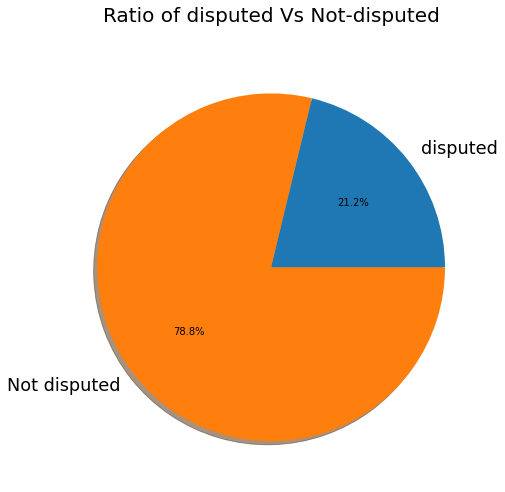

In [217]:
disputed =len(new_df[new_df['Consumer disputed']==1])
notdisputed = len(new_df[new_df['Consumer disputed']==0])

# Data to plot
labels = 'disputed','Not disputed'
sizes = [disputed,notdisputed]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of disputed Vs Not-disputed\n', fontsize=20)
sns.set_context("paper", font_scale=2)

**Or:**

>**To check if our data is imbalanced or not:**

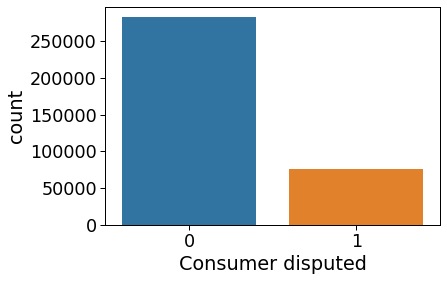

In [218]:
sns.countplot(x="Consumer disputed",data=df)

**The dataset is highly imbalanced.**

**I used the Adaptive Synthetic (ADASYN) to oversample the minority class.**

In [219]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=7)
X_adasyn, y_adasyn = adasyn.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


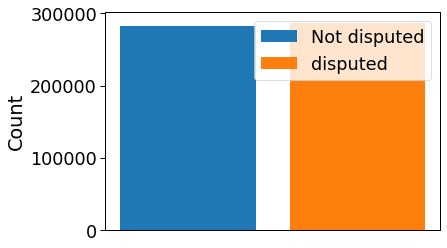

In [220]:
import numpy as np
_, counts=np.unique(y_adasyn,return_counts=True)


customer_not_disputed=counts[0]
customer_disputed=counts[1]


plt.bar(0,customer_not_disputed,label='Not disputed')
plt.bar(1,customer_disputed,label='disputed')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

In [221]:
print(X.shape)
print(y.shape)
print(X_adasyn.shape)
print(y_adasyn.shape)
print(test_df.shape)
print(new_df.shape)

(358810, 52)
(358810,)
(569850, 52)
(569850,)
(119606, 52)
(358810, 53)


In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.33334,random_state=7)

In [223]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(239204, 52)
(239204,)
(119606, 52)
(119606,)


**Using Dummy Classifier to verify the inbalance data output**

In [224]:
from sklearn.dummy import DummyClassifier
# DummyClassifier will end up predicting only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', np.unique(dummy_pred))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0.]
Test score:  0.7863986756517232


**Upsampling**

In [225]:
# separate minority and majority classes
from sklearn.utils import resample

not_disputed = new_df[new_df["Consumer disputed"]==0]
disputed= new_df[new_df["Consumer disputed"]==1]

# upsample minority
disputed_upsampled = resample(disputed,
                              replace=True, # sample with replacement
                              n_samples=len(not_disputed),# match number in majority class
                              random_state=7)# reproducible results
                          
                       
                           

# combine majority and upsampled minority
upsampled = pd.concat([not_disputed, disputed_upsampled],0)

# check new class counts
upsampled["Consumer disputed"].value_counts()


1.0    282638
0.0    282638
Name: Consumer disputed, dtype: int64

In [226]:
# trying logistic regression with the balanced dataset

from sklearn.linear_model import LogisticRegression

y_train = upsampled["Consumer disputed"]
X_train = upsampled.drop("Consumer disputed", axis=1)

upsampled = LogisticRegression(solver='liblinear',random_state=7).fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [227]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.4970402822600873

In [228]:
from sklearn.metrics import classification_report

print('Logistic Regression classification_report')

print('...'*10)

print(classification_report(y_test,upsampled_pred))

Logistic Regression classification_report
..............................
              precision    recall  f1-score   support

         0.0       0.79      0.49      0.61     94058
         1.0       0.22      0.52      0.30     25548

    accuracy                           0.50    119606
   macro avg       0.50      0.50      0.46    119606
weighted avg       0.67      0.50      0.54    119606



In [229]:
# confusion matrix

from sklearn.metrics import confusion_matrix


pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,46253,47805
1,12352,13196


**DownSampling**

In [230]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_disputed_downsampled = resample(not_disputed,
                                replace = False, # sample without replacement
                                n_samples = len(disputed), # match minority n
                                random_state = 7) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_disputed_downsampled, disputed])

# checking counts
downsampled["Consumer disputed"].value_counts()

1.0    76172
0.0    76172
Name: Consumer disputed, dtype: int64

In [231]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled["Consumer disputed"]
X_train = downsampled.drop("Consumer disputed", axis=1)

undersampled = LogisticRegression(solver='liblinear',multi_class='ovr',random_state=7).fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [232]:
undersampled_pred

array([1., 0., 0., ..., 1., 0., 0.])

In [233]:
# Checking accuracy
accuracy_score(y_test, undersampled_pred)

0.4970319214755113

In [234]:
from sklearn.metrics import classification_report

print('Logistic Regression classification_report on DownSampling')

print('...'*10)

print(classification_report(y_test,undersampled_pred))

Logistic Regression classification_report on DownSampling
..............................
              precision    recall  f1-score   support

         0.0       0.79      0.49      0.61     94058
         1.0       0.22      0.52      0.30     25548

    accuracy                           0.50    119606
   macro avg       0.50      0.50      0.46    119606
weighted avg       0.67      0.50      0.54    119606



In [235]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

,0,1
0,46253,47805
1,12353,13195


**Generate Synthetic Samples**
>**SMOTE(SMOTE or Synthetic Minority Oversampling Technique)**
>>**SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm   to creates sythetic observations of the minority clas**

In [236]:
from imblearn.over_sampling import SMOTE
# Separate input features and target
y = new_df["Consumer disputed"]
X = new_df.drop("Consumer disputed", axis=1)

# setting up testing and training sets
X_train1, X_test1, y_train1, y_test1 =train_test_split(X, y, test_size=.33334, random_state=27)

In [237]:
sm = SMOTE(random_state=27)
X_train1, y_train1 = sm.fit_sample(X_train1, y_train1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [238]:
smote = LogisticRegression(solver='liblinear',multi_class='ovr',random_state=27).fit(X_train1, y_train1)

smote_pred = smote.predict(X_test1)

# Checking accuracy
accuracy_score(y_test1, smote_pred)

0.6749744996070431

In [239]:
pd.DataFrame(confusion_matrix(y_test1, smote_pred))

,0,1
0,74490,19720
1,19155,6241


In [240]:
print(classification_report(y_test1, smote_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79     94210
         1.0       0.24      0.25      0.24     25396

    accuracy                           0.67    119606
   macro avg       0.52      0.52      0.52    119606
weighted avg       0.68      0.67      0.68    119606



In [242]:
y_train.shape
X_train.shape

(152344, 52)

In [244]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(n_estimators=10).fit(X_train,y_train)

# predict on test set
randf_pred = randf.predict(X_test)

accuracy_score(y_test, randf_pred)

0.7833720716352023

In [245]:
pd.DataFrame(confusion_matrix(y_test1, randf_pred))

,0,1
0,55180,39030
1,14844,10552


In [247]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_best = gnb.fit(X_train, y_train)
# predict on test set
gnb_pred = gnb_best.predict(X_test)
accuracy_score(y_test, gnb_pred)

0.5528568800896276

In [248]:
df_new_sample=pd.concat([X_train,y_train],1).sample(10000)
df_new_sample.shape

(10000, 53)

In [ ]:
y_train_sample=df_new_sample["Consumer disputed"]
X_train_sample=df_new_sample.drop("Consumer disputed",1)
y_train_sample.value_counts()

0.0    5011
1.0    4989
Name: Consumer disputed, dtype: int64

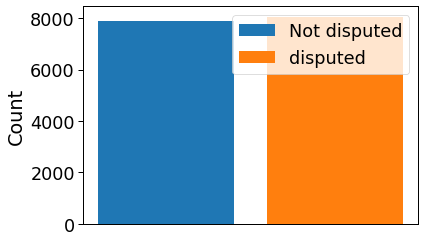

In [268]:
import numpy as np
_, counts=np.unique(y2_adasyn,return_counts=True)


customer_not_disputed=counts[0]
customer_disputed=counts[1]


plt.bar(0,customer_not_disputed,label='Not disputed')
plt.bar(1,customer_disputed,label='disputed')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

In [280]:
X2_adasyn.shape

(15514, 52)

# Grid Search 

Here are the parameters for <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV'>GridSearchCV</a>:
- __estimator__: `model`
- __param_grid__: `dist or list of dictionaries` Parameters to the estimator/model
- __scoring__: `string,callable, list/tuple, dict or None, default: None` Evaluating metrics
- __cv__: `int or callable` Cross validation

In [281]:
from sklearn.ensemble import RandomForestClassifier
random_grid = {'n_estimators': range(5,20,3),
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : [5,10,20,30],
              'min_samples_split':[2,5,10],
              'criterion':['entropy'],
              'min_samples_leaf':[1,2,4]}

rf=RandomForestClassifier(oob_score=True,random_state=7,class_weight='balanced')
rf_gs = GridSearchCV(rf, random_grid, cv = 10,scoring="roc_auc" ,n_jobs=-1, verbose=2)

rf_gs.fit(X2_adasyn,y2_adasyn)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 11.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_job...
                                              oob_score=True, random_state=7,
                                 

**<div style="background-color:##EDF9FF">
  <ul><li><h3>Results sorted by rank</h3></li></ul>
</div>**

In [299]:
pd.DataFrame(rf_gs.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
279,0.793061,0.018306,0.014757,0.000367,entropy,30,auto,1,5,17,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.635714,0.644645,0.688738,0.976794,0.973929,0.979469,0.979772,0.981449,0.981347,0.978225,0.882008,0.148277,1
324,0.796039,0.017905,0.015776,0.002005,entropy,30,sqrt,1,5,17,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.635714,0.644645,0.688738,0.976794,0.973929,0.979469,0.979772,0.981449,0.981347,0.978225,0.882008,0.148277,1
274,0.877632,0.063977,0.015753,0.000506,entropy,30,auto,1,2,17,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.644253,0.635000,0.691782,0.975572,0.974389,0.978984,0.979534,0.979111,0.979613,0.978815,0.881705,0.147735,3
319,0.872021,0.051006,0.016312,0.001443,entropy,30,sqrt,1,2,17,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.644253,0.635000,0.691782,0.975572,0.974389,0.978984,0.979534,0.979111,0.979613,0.978815,0.881705,0.147735,3
184,0.723669,0.024302,0.013851,0.000589,entropy,20,auto,1,2,17,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.632768,0.651079,0.689936,0.973863,0.973702,0.978590,0.976395,0.979366,0.978413,0.977827,0.881194,0.146755,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.103156,0.004372,0.005332,0.000309,entropy,5,sqrt,4,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.547137,0.562664,0.613535,0.870596,0.855220,0.863507,0.865007,0.875782,0.860670,0.869915,0.778403,0.134528,353
60,0.107692,0.003416,0.005965,0.000764,entropy,5,sqrt,2,2,5,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.547079,0.564761,0.610829,0.869709,0.856309,0.862330,0.866244,0.875706,0.859128,0.870148,0.778224,0.134463,357
15,0.106196,0.007989,0.008483,0.006021,entropy,5,auto,2,2,5,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.547079,0.564761,0.610829,0.869709,0.856309,0.862330,0.866244,0.875706,0.859128,0.870148,0.778224,0.134463,357
65,0.104511,0.006287,0.005841,0.000294,entropy,5,sqrt,2,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.547079,0.564670,0.610829,0.869709,0.856309,0.862330,0.866244,0.875618,0.859094,0.870148,0.778203,0.134469,359


**Conclusion: we have find how to use GridSearch to find optimal hyperparameters.**

In [285]:
rf_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 17}

In [284]:
rf_gs.best_score_

0.8820082021310723

In [ ]:
# predict on test set
rf_gs_pred = rf_gs.predict(X_test)
accuracy_score(y_test, rf_gs_pred)

**as size of y_test(y here) is larger than prediction I see the accuracy differes with best rf_gs.best_score_ otherwise it would be same.**

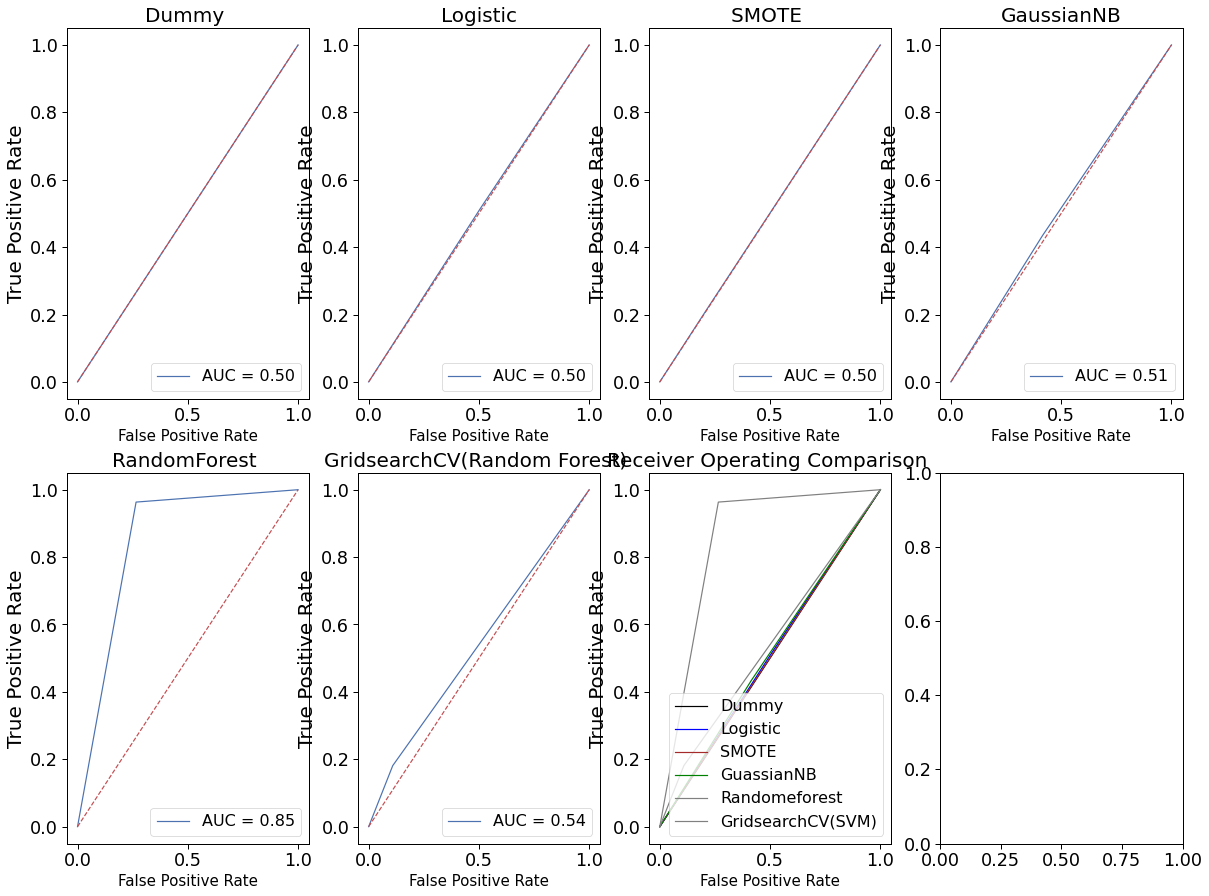

In [286]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 4, figsize = (20,15))


#----------Dummy---------


dummy_pred = dummy.predict(X_test)
fprdm, tprdm, thresholddm = metrics.roc_curve(y_test,dummy_pred)
roc_aucxgb = metrics.auc(fprdm,tprdm)

ax_arr[0,0].plot(fprdm,  tprdm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Dummy ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#----------Logistics---------

undersampled_pred = undersampled.predict(X_test)
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, undersampled_pred)
roc_aucxgb = metrics.auc(fprlog, tprlog)

ax_arr[0,1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Logistic',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#----------SMOTE---------


smote_pred = smote.predict(X_test1)
#preds = probs[:,1]
fprsm, tprsm, thresholdsm = metrics.roc_curve(y_test, smote_pred)
roc_aucxgb = metrics.auc(fprsm, tprsm)


ax_arr[0,2].plot(fprsm, tprsm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('SMOTE ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})



#----------GaussianNB---------

gnb_pred = gnb_best.predict(X_test)
#preds = probs[:,1]
fprgnb, tprgnb, thresholdgnd = metrics.roc_curve(y_test, gnb_pred)
roc_aucxgb = metrics.auc(fprgnb, tprgnb)


ax_arr[0,3].plot(fprgnb, tprgnb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,3].plot([0, 1], [0, 1],'r--')
ax_arr[0,3].set_title('GaussianNB',fontsize=20)
ax_arr[0,3].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,3].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,3].legend(loc = 'lower right', prop={'size': 16})


#----------Random Forest---------


randf_pred = randf.predict(X_test)
#preds = probs[:,1]
fprfst, tprfst, thresholdfst = metrics.roc_curve(y_test, randf_pred)
roc_aucxgb = metrics.auc(fprfst, tprfst)


ax_arr[1,0].plot(fprfst, tprfst, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('RandomForest ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#----------GridsearchCV(Random Forest)---------


rf_gs_pred = rf_gs.predict(X_test)
fprgsv, tprgsv, thresholdgsv = metrics.roc_curve(y_test, rf_gs_pred )
roc_aucxgb = metrics.auc(fprgsv,  tprgsv)


ax_arr[1,1].plot(fprgsv,  tprgsv, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('GridsearchCV(Random Forest) ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})


#----------ALL---------


ax_arr[1,2].plot(fprdm, tprdm, 'b', label = 'Dummy', color='black')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='blue')
ax_arr[1,2].plot(fprsm, tprsm, 'b', label = 'SMOTE', color='brown')
ax_arr[1,2].plot(fprgnb, tprgnb, 'b', label = 'GuassianNB', color='green')
ax_arr[1,2].plot(fprfst, tprfst, 'b', label = 'Randomeforest', color='grey')
ax_arr[1,2].plot(fprgsv,  tprgsv, 'b', label = 'GridsearchCV(SVM)', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

**From the given graph I see that random forest has done a better job than using random forest with grid search CV. Because of the higher AUC (area under the curve) score, the better the model is.**

**Model combination using Kfold cross validation:**

In [289]:

from sklearn.model_selection import cross_val_score,KFold
#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

models=[]
models.append(("lr",LogisticRegression()))
models.append(("descion tree",DecisionTreeClassifier()))
models.append(("svm",SVC()))
models.append(("Knn",KNeighborsClassifier()))
models.append(("naive bayes",GaussianNB()))
models.append(("Random Forest",RandomForestClassifier()))
 
for name,model in models:
  kfold=KFold(n_splits=10,random_state=5)
  cross_val_sc=cross_val_score(model,X2_adasyn,y2_adasyn,scoring="accuracy",cv=kfold)
  print("{} : acc :{}(standard deviation: {})".format(name,cross_val_sc.mean(),cross_val_sc.std()))

lr : acc :0.16532229788563416(standard deviation: 0.11523033133171959)
descion tree : acc :0.7530200003988115(standard deviation: 0.11406839236699608)
svm : acc :0.1673854829275426(standard deviation: 0.11865406636646937)
Knn : acc :0.5415699548678272(standard deviation: 0.03936438040539266)
naive bayes : acc :0.16777233012290044(standard deviation: 0.11932082685729822)
Random Forest : acc :0.8260442215531052(standard deviation: 0.08752760560918849)


**I see that RandomForest has done a great job.**

**Another approach using Xgboost:**

In [300]:
from xgboost.sklearn import XGBClassifier
xgb_model = XGBClassifier(num_class = 2,
                           objective="multi:softprob",
                           eval_metric="mlogloss",
                            seed=42,random_state=7) 
                          
xgb_model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=2, objective='multi:softprob',
              random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=None, subsample=1, verbosity=1)

In [301]:
prediction6=xgb_model.predict(test_df)


In [302]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y.tolist()[0:119606],prediction6)
accuracy


0.7824691069009916

In [303]:
y.value_counts()

0.0    282638
1.0     76172
Name: Consumer disputed, dtype: int64

0.7824691069009916
*******************************************
Confusion matrix


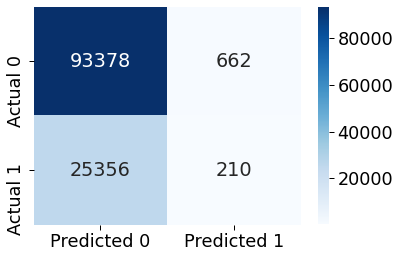

********************************************
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88     94040
         1.0       0.24      0.01      0.02     25566

    accuracy                           0.78    119606
   macro avg       0.51      0.50      0.45    119606
weighted avg       0.67      0.78      0.69    119606



In [304]:

from sklearn import metrics


print(metrics.accuracy_score(y.tolist()[0:119606],prediction6))
print('*******************************************')
print('Confusion matrix')
xgb_cfm=metrics.confusion_matrix(y.tolist()[0:119606],prediction6)

lbl1=["Predicted 0", "Predicted 1"]
lbl2=["Actual 0", "Actual 1"]

sns.heatmap(xgb_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()
print('********************************************')
print(metrics.classification_report(y.tolist()[0:119606],prediction6))

**How to set scale_pos_weight hyperameter for an imbalanced dataset to avoid towards great accuracy with majority class?**


> **Firstly,We are dealing with imbalanced datasets. As a reason, we more focus on scoring parameter as "roc_auc" as a significant metric. By applying XGBClassifier Let's see if we can further increase the roc_auc score than using RandomForestClassifier.**


**By heuristic approach:**
*   **First counting each class. 
      Here,Majority class(=0) counts=282638, Minority class(=1) counts=76172**
*   **using the formula,scale_pos_weight=Minority class counts/Majority     class counts**

* **Here,scale_pos_weight=76172/282638=0.27**   

**OR:**

> **We can be applying a set of weights by GridSearchCv with XGBClassifier to see which one's perform the best.**







In [308]:
y3=df["Consumer disputed"]
X3=df.drop(['Consumer disputed','Complaint ID'],1)

In [330]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# define model
model = XGBClassifier(scale_pos_weight=0.2736)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
# evaluate model
scores = cross_val_score(model, X3, y3, scoring='roc_auc', cv=cv, n_jobs=-1,verbose=2)
# summarize performance
print('Mean ROC AUC: %.5f' % np.mean(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Mean ROC AUC: 0.62541


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 20.2min finished


In [ ]:
# define model
model = XGBClassifier()
# define grid
weights = [.01, .1, .27, .50, .75, .99, 1, 10]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc',verbose=2)
# execute the grid search
grid_result = grid.fit(X3,y3)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 8 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 22.1min


In [312]:
# define model
model = XGBClassifier()
# define grid
weights = [.01, .1, .27, .50, .75, .99, 1, 10]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc',verbose=2)
# execute the grid search
grid_result = grid.fit(X2_adasyn,y2_adasyn)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 8 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.8min finished


Best: 0.867247 using {'scale_pos_weight': 0.99}
0.824670 (0.008173) with: {'scale_pos_weight': 0.01}
0.855474 (0.008330) with: {'scale_pos_weight': 0.1}
0.861442 (0.008317) with: {'scale_pos_weight': 0.27}
0.864744 (0.008323) with: {'scale_pos_weight': 0.5}
0.866255 (0.008411) with: {'scale_pos_weight': 0.75}
0.867247 (0.008249) with: {'scale_pos_weight': 0.99}
0.867217 (0.008268) with: {'scale_pos_weight': 1}
0.867075 (0.008373) with: {'scale_pos_weight': 10}


In [316]:
xgb_gs_clf1 = XGBClassifier(num_class = 2,
                           objective="multi:softprob",
                           eval_metric="mlogloss",
                           seed=42)                         
                        
param_grid1 = {"max_depth": [10,15,20],
              "n_estimators": range(5,20,5) , 
              "gamma": [0.03,0.05], 
              "scale_pos_weight":[.01, .1, .27, .50, .75, .99, 1, 10]
              }
#              "min_child_weight": [5,10], #"learning_rate":[0.05,0.01]
#              "colsample_bytree": [0.4,0.8], 
#              "subsample": [0.50,0.85]} 

grid_search1 = GridSearchCV(xgb_gs_clf1, 
                           param_grid=param_grid1,
                           cv = 5,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=2)
grid_search1.fit(X2_adasyn,y2_adasyn)
grid_search1.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 20.8min finished


{'gamma': 0.03, 'max_depth': 20, 'n_estimators': 15, 'scale_pos_weight': 0.01}

In [317]:
grid_search1.best_score_

0.8709693406620778

**I only recommend RandomForest() and xgboost.sklearn.XGBClassifier() to get the prediction.**